In [3]:
pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
from yellowbrick.cluster import KElbowVisualizer

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
import scipy.cluster.hierarchy as sch   #dendogram
from sklearn.metrics import silhouette_score

In [7]:
data=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')

# EDA and data visualization

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [9]:
data.shape

(3999, 12)

In [10]:
data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [11]:
data.dropna(inplace=True)

In [12]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [13]:
data=data.iloc[:,1:]

In [14]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


# scaling

In [15]:
scalar=MinMaxScaler()
scaled_data=scalar.fit_transform(data)
scaled_data

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

# Evalution

# Elbow Method

In [16]:
no_of_clusters=range(2,11)
inertia=[]
for i in no_of_clusters:
    KMeans_model=KMeans(n_clusters=i)
    KMeans_model.fit_predict(scaled_data)
    inertia.append(KMeans_model.inertia_)

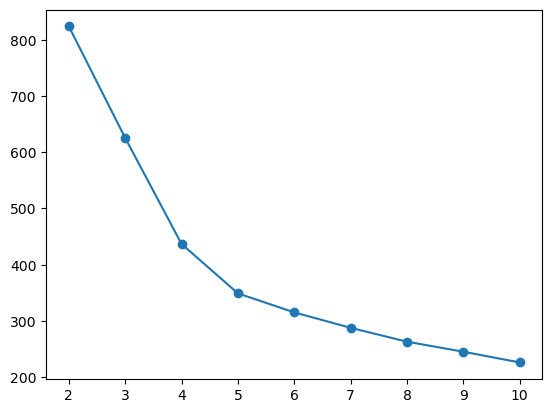

In [59]:
plt.scatter(no_of_clusters,inertia)
plt.plot(no_of_clusters,inertia)
plt.show()

# silhouette

In [60]:
no_of_clusters=range(2,11)
l=[]
for i in no_of_clusters:
    HC_model=AgglomerativeClustering(n_clusters=i,affinity="l2",linkage="complete")
    HC_model.fit_predict(scaled_data)
    l.append(silhouette_score(scaled_data,HC_model.fit_predict(scaled_data)))

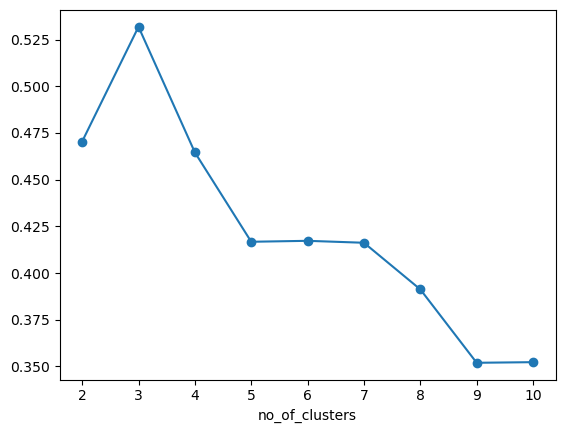

In [61]:
plt.scatter(no_of_clusters,l)
plt.plot(no_of_clusters,l)
plt.xlabel("no_of_clusters")
plt.show()

# KMeans based on ELBOW

In [62]:
KMeans_model=KMeans(n_clusters=4)
KMeans_model.fit_predict(scaled_data)

array([0, 0, 0, ..., 2, 0, 0])

In [63]:
data["KMeans"]=KMeans_model.labels_

In [64]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


# Hierarchical based on Silhouette

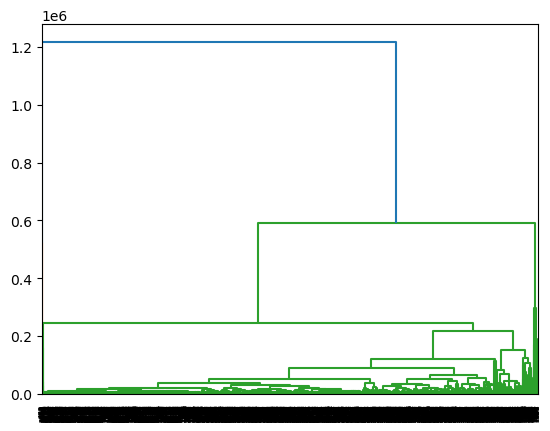

In [72]:
dendrogram = sch.dendrogram(sch.linkage(data, method='average'))

In [73]:
HC_model=AgglomerativeClustering(n_clusters=3,affinity="l2",linkage="complete")
HC_model.fit_predict(scaled_data)

array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

In [74]:
data["Hierarchical"]=HC_model.labels_

In [75]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans,Hierarchical
0,28143,0,1,1,1,174,1,0,0,7000,0,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2,0


# DBSCAN

In [76]:
DB_model=DBSCAN(eps=0.5,min_samples=5)
DB_model.fit_predict(scaled_data)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [77]:
np.unique(DB_model.fit_predict(scaled_data))

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [78]:
data["DBSCAN"]=DB_model.labels_

In [79]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans,Hierarchical,DBSCAN
0,28143,0,1,1,1,174,1,0,0,7000,0,0,2,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,2,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,2,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,2,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2,0,1


In [80]:
data["DBSCAN"].value_counts()

 0    2486
 1    1451
 4      16
-1      14
 2      11
 3       9
 5       6
 6       6
Name: DBSCAN, dtype: int64